# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


In [3]:
# print(cities)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = '&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
#         pprint(weather_json)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova sintra
Processing Record 2 of Set 1 | hammerfest
Processing Record 3 of Set 1 | xichang
Processing Record 4 of Set 1 | markaz-e hukumat-e darweshan
Processing Record 5 of Set 1 | ayr
Processing Record 6 of Set 1 | ofunato
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | normandy park
Processing Record 11 of Set 1 | mukah
City not found. Skipping...
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | mont-joli
Processing Record 14 of Set 1 | masterton
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | llandrindod wells
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | port sudan
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | nuku'alofa
Processing Record 21 of Set 1 | kodiak
Processing Record 2

Processing Record 41 of Set 4 | zholymbet
Processing Record 42 of Set 4 | harrisonville
Processing Record 43 of Set 4 | margaret river
Processing Record 44 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 45 of Set 4 | vilyuchinsk
Processing Record 46 of Set 4 | whakatane
Processing Record 47 of Set 4 | liuhe
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | gaiman
Processing Record 0 of Set 5 | puerto baquerizo moreno
Processing Record 1 of Set 5 | bardai
Processing Record 2 of Set 5 | misratah
Processing Record 3 of Set 5 | vorkuta
Processing Record 4 of Set 5 | mongu
Processing Record 5 of Set 5 | okha
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | sittwe
Processing Record 8 of Set 5 | tiszafured
Processing Record 9 of Set 5 | tulun
Processing Record 10 of Set 5 | pathein
Processing Record 11 of Set 5 | olonkinbyen
Processing Record 12 of Set 5 | shantobe
Processing Record 13 of Set 5 | san patricio
Processing Record 1

Processing Record 31 of Set 8 | trinity beach
Processing Record 32 of Set 8 | hithadhoo
Processing Record 33 of Set 8 | morant bay
Processing Record 34 of Set 8 | san jose village
City not found. Skipping...
Processing Record 35 of Set 8 | chojnow
Processing Record 36 of Set 8 | tambopata
Processing Record 37 of Set 8 | senador jose porfirio
Processing Record 38 of Set 8 | mukalla
Processing Record 39 of Set 8 | qaryat suluq
Processing Record 40 of Set 8 | ust-nera
Processing Record 41 of Set 8 | aasiaat
Processing Record 42 of Set 8 | yacuiba
Processing Record 43 of Set 8 | howrah
Processing Record 44 of Set 8 | paraiso
Processing Record 45 of Set 8 | banff
Processing Record 46 of Set 8 | vengerovo
Processing Record 47 of Set 8 | torbat-e heydariyeh
Processing Record 48 of Set 8 | katsuren-haebaru
Processing Record 49 of Set 8 | jwaneng
Processing Record 0 of Set 9 | oppdal
Processing Record 1 of Set 9 | flin flon
Processing Record 2 of Set 9 | sitka
Processing Record 3 of Set 9 | kha

Processing Record 20 of Set 12 | horta
Processing Record 21 of Set 12 | newman
Processing Record 22 of Set 12 | illizi
Processing Record 23 of Set 12 | mweka
Processing Record 24 of Set 12 | mejit
Processing Record 25 of Set 12 | nikolayevsk-on-amure
Processing Record 26 of Set 12 | al bayda
Processing Record 27 of Set 12 | rongelap
Processing Record 28 of Set 12 | minas de marcona
Processing Record 29 of Set 12 | mongoumba
Processing Record 30 of Set 12 | acarau
Processing Record 31 of Set 12 | petrolina
Processing Record 32 of Set 12 | zyryanovsk
Processing Record 33 of Set 12 | galveston
Processing Record 34 of Set 12 | santander
Processing Record 35 of Set 12 | mogocha
Processing Record 36 of Set 12 | dalby
Processing Record 37 of Set 12 | mantua
Processing Record 38 of Set 12 | espargos
City not found. Skipping...
Processing Record 39 of Set 12 | ouadda
Processing Record 40 of Set 12 | palmer
Processing Record 41 of Set 12 | izluchinsk
Processing Record 42 of Set 12 | isola di cap

In [18]:
### convert UTC time to human readable:
# test_date_function = time.asctime(time.gmtime(weather_json['dt']))
# pprint(weather_json)
# print('---------------------------------------')
# print(test_date_function)

In [48]:
# check list data:
pprint(city_data[350])

{'City': 'fuding',
 'Cloudiness': 100,
 'Country': 'CN',
 'Date': 1683559104,
 'Humidity': 94,
 'Lat': 27.3273,
 'Lng': 120.214,
 'Max Temp': 16.43,
 'Wind Speed': 0.81}


In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,20.73,77,0,4.07,CV,1683558969
1,hammerfest,70.6634,23.6821,1.25,93,75,2.57,NO,1683558970
2,xichang,27.8964,102.2634,16.88,73,52,2.57,CN,1683558970
3,markaz-e hukumat-e darweshan,31.1323,64.1934,28.88,7,0,4.96,AF,1683558971
4,ayr,55.4627,-4.6339,15.17,100,100,4.12,GB,1683558971


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,20.73,77,0,4.07,CV,1683558969
1,hammerfest,70.6634,23.6821,1.25,93,75,2.57,NO,1683558970
2,xichang,27.8964,102.2634,16.88,73,52,2.57,CN,1683558970
3,markaz-e hukumat-e darweshan,31.1323,64.1934,28.88,7,0,4.96,AF,1683558971
4,ayr,55.4627,-4.6339,15.17,100,100,4.12,GB,1683558971


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

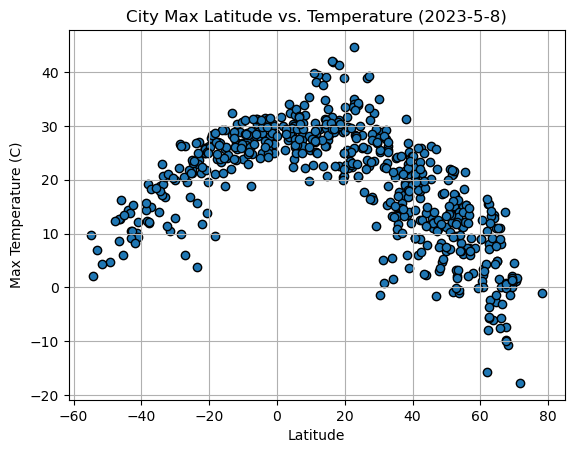

In [53]:
# Build scatter plot for latitude vs. temperature
x_ax = city_data_df['Lat']
y_ax = city_data_df['Max Temp']
plt.scatter(x_ax, y_ax, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023-5-8)')
plt.grid()



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

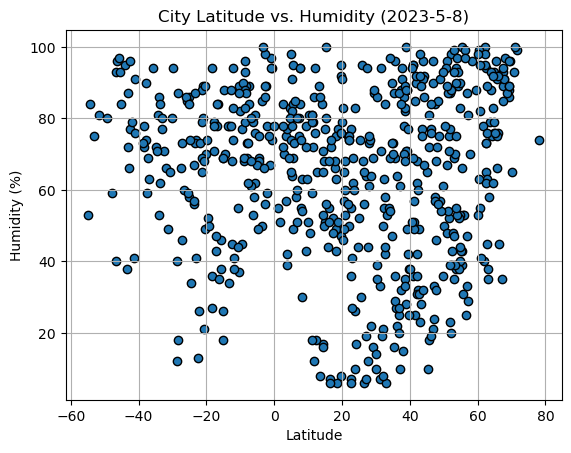

In [54]:
# Build the scatter plots for latitude vs. humidity
x_ax = city_data_df['Lat']
y_ax = city_data_df['Humidity']
plt.scatter(x_ax, y_ax, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-5-8)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

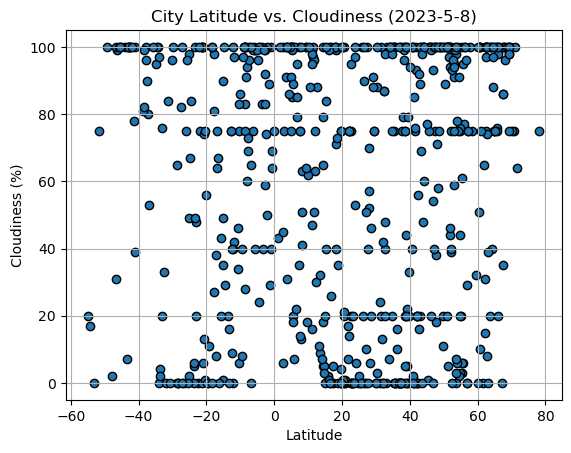

In [55]:
# Build the scatter plots for latitude vs. cloudiness
x_ax = city_data_df['Lat']
y_ax = city_data_df['Cloudiness']
plt.scatter(x_ax, y_ax, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-5-8)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

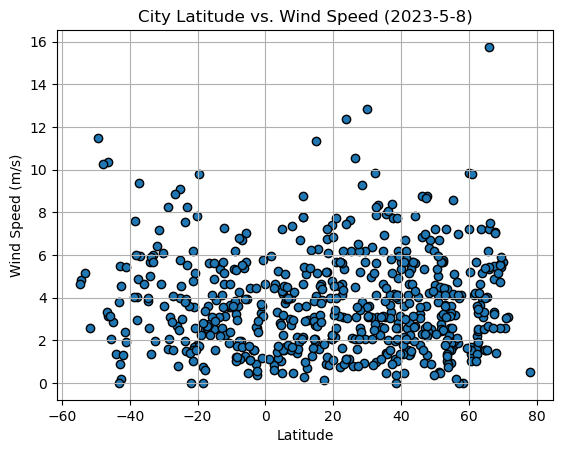

In [56]:
# Build the scatter plots for latitude vs. wind speed
x_ax = city_data_df['Lat']
y_ax = city_data_df['Wind Speed']
plt.scatter(x_ax, y_ax, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-5-8)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


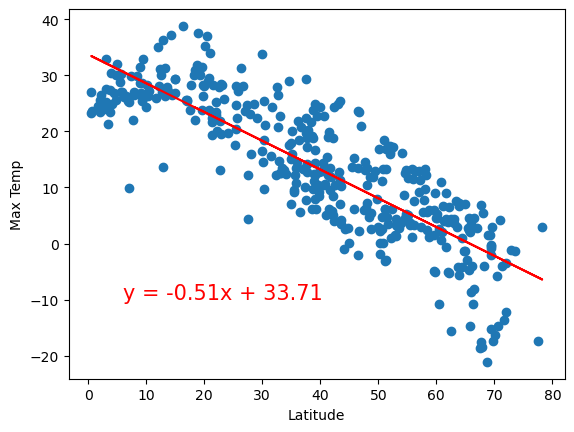

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


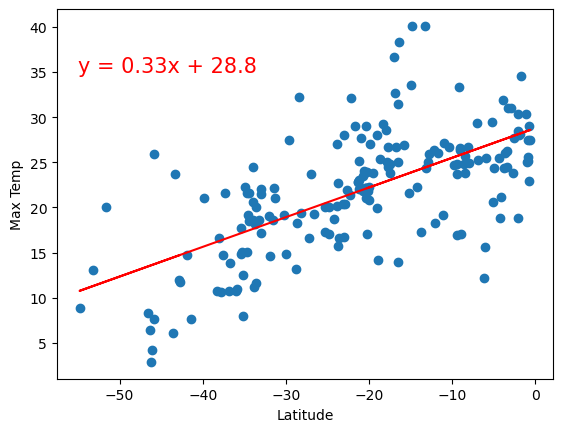

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


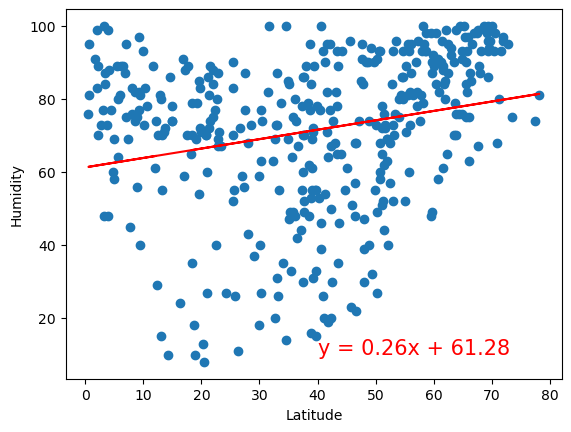

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


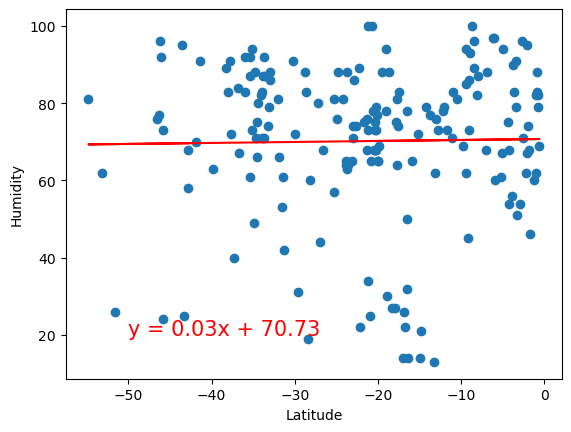

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


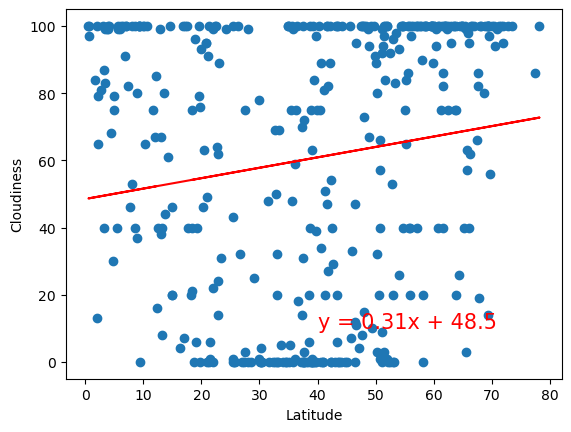

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


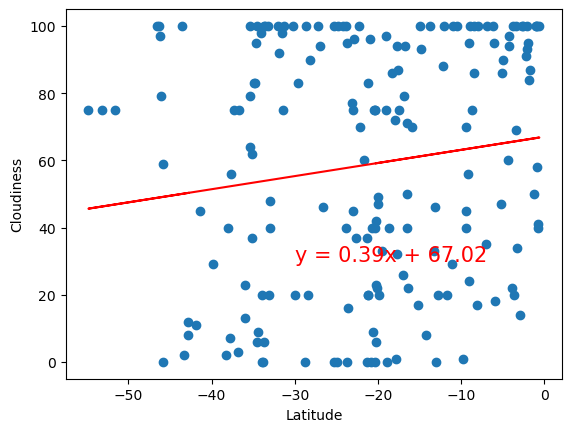

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


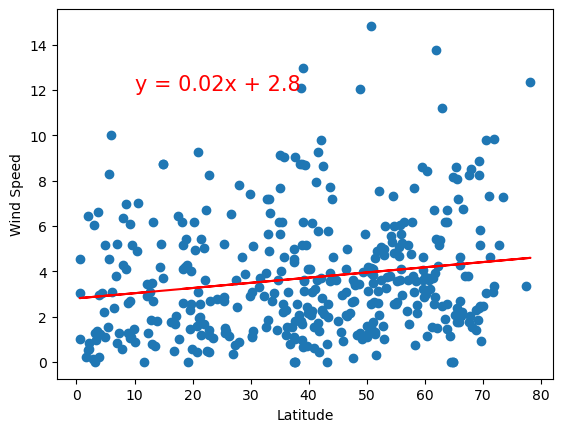

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


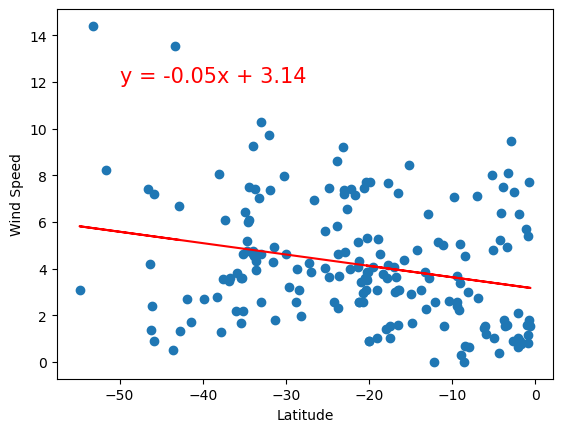

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE